In [5]:
from PIL import Image
import requests
import torch
from transformers import pipeline

In [2]:
img_urls = ["https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cats.png", "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cats.jpeg"]
image_real = Image.open(requests.get(img_urls[0], stream=True).raw).convert("RGB")
image_gen = Image.open(requests.get(img_urls[1], stream=True).raw).convert("RGB")

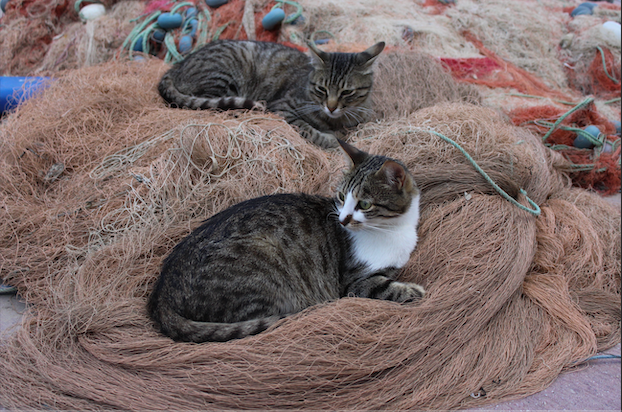

In [3]:
image_real

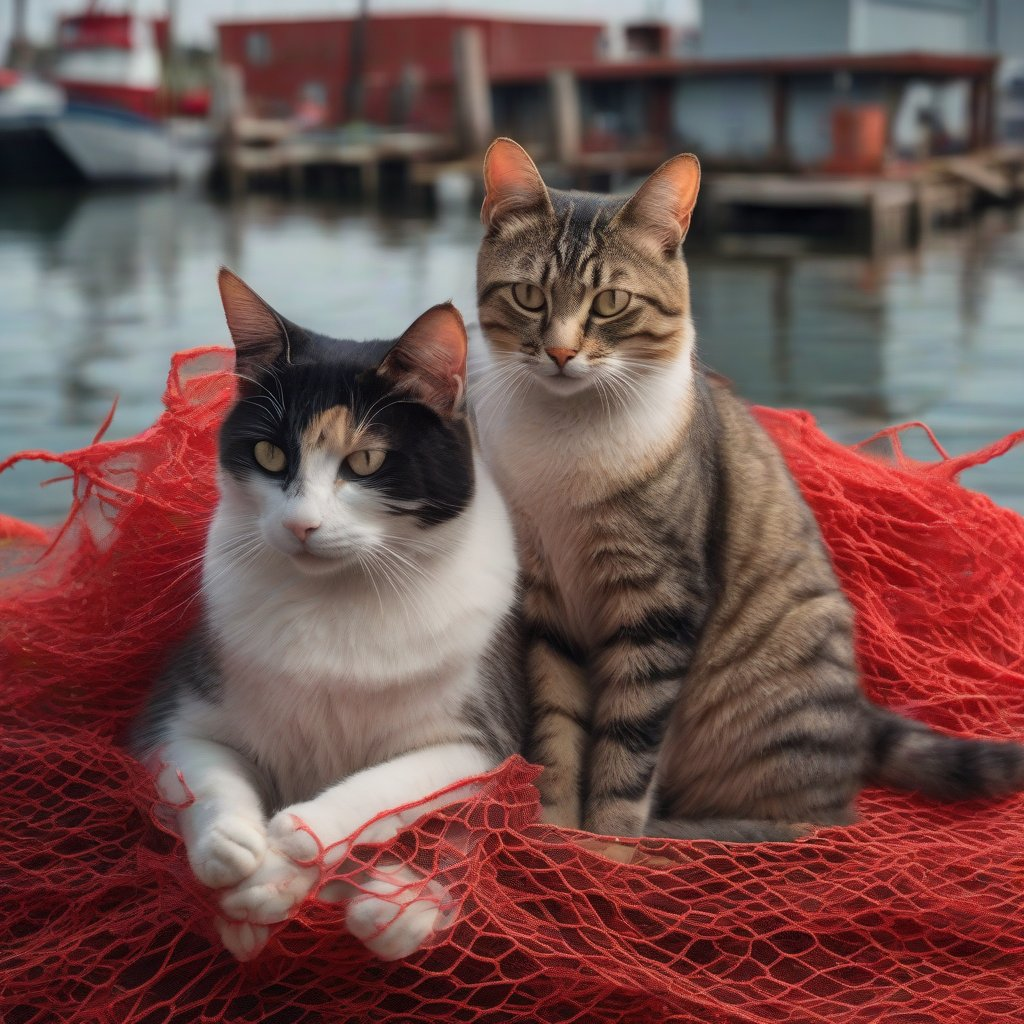

In [4]:
image_gen

In [6]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-feature-extraction", model_name="google/vit-base-patch16-384", device=DEVICE, pool=True)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [7]:
outputs = pipe([image_real, image_gen])

In [16]:
len(outputs[0][0])

768

In [19]:
len(outputs[1][0])

768

In [20]:
from torch.nn.functional import cosine_similarity

In [21]:
similarity_score = cosine_similarity(torch.Tensor(outputs[0]),
                                     torch.Tensor(outputs[1]), dim=1)
print(similarity_score)


tensor([0.5858])


In [22]:
pipe = pipeline(task="image-feature-extraction", model_name="google/vit-base-patch16-224", device=DEVICE)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [23]:
output = pipe(image_real)


In [24]:
import numpy as np
print(np.array(outputs).shape)

(2, 1, 768)


# Getting Features and Similarities using AutoModel

In [25]:
from transformers import AutoImageProcessor, AutoModel

In [26]:
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModel.from_pretrained("google/vit-base-patch16-224").to(DEVICE)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
def infer(image):
    inputs = processor(image, return_tensors="pt").to(DEVICE)
    outputs = model(**inputs)
    return outputs.pooler_output

In [28]:
embed_real = infer(image_real)
embed_gen = infer(image_gen)

In [29]:
similarity_score = cosine_similarity(embed_real, embed_gen, dim=1)
print(similarity_score)

tensor([0.5939], device='cuda:0', grad_fn=<SumBackward1>)
